# Name : Manan Sharma

# Data Science and Business Analytics Internship at the Sparks Foundation

# Goal : Exploratory Data Analysis on "Indian Premier League" dataset

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [63]:
match_df = pd.read_csv("/Users/Manan/matches.csv")
match_df.head(7)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [3]:
match_df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [4]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
id                 756 non-null int64
season             756 non-null int64
city               749 non-null object
date               756 non-null object
team1              756 non-null object
team2              756 non-null object
toss_winner        756 non-null object
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             752 non-null object
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    752 non-null object
venue              756 non-null object
umpire1            754 non-null object
umpire2            754 non-null object
umpire3            119 non-null object
dtypes: int64(5), object(13)
memory usage: 106.4+ KB


In [8]:
#Checking shape of matches dataframe
match_df.shape   #756 rows and 18 columns

(756, 18)

In [64]:
delivery_df = pd.read_csv("/Users/Manan/deliveries.csv")
delivery_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
delivery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
match_id            179078 non-null int64
inning              179078 non-null int64
batting_team        179078 non-null object
bowling_team        179078 non-null object
over                179078 non-null int64
ball                179078 non-null int64
batsman             179078 non-null object
non_striker         179078 non-null object
bowler              179078 non-null object
is_super_over       179078 non-null int64
wide_runs           179078 non-null int64
bye_runs            179078 non-null int64
legbye_runs         179078 non-null int64
noball_runs         179078 non-null int64
penalty_runs        179078 non-null int64
batsman_runs        179078 non-null int64
extra_runs          179078 non-null int64
total_runs          179078 non-null int64
player_dismissed    8834 non-null object
dismissal_kind      8834 non-null object
fielder             6448 non-null object
dtype

In [9]:
delivery_df.shape   #Shape of delivery df 

(179078, 21)

# Checking null values in both datasets

In [7]:
match_df.isnull().sum()    #So there are few null values, but in umpire3, there are too many- so it's better to drop it

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [10]:
delivery_df.isnull().sum()   #There are too many null values in player dismissed, dissimal kind and fielder.

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [11]:
match_df[match_df.city.isnull()][['city','venue']]
#Checking which venue has null city, so we can add 'Dubai in city column'

,city,venue
461,NaN,Dubai International Cricket Stadium
462,NaN,Dubai International Cricket Stadium
466,NaN,Dubai International Cricket Stadium
468,NaN,Dubai International Cricket Stadium
469,NaN,Dubai International Cricket Stadium
474,NaN,Dubai International Cricket Stadium
476,NaN,Dubai International Cricket Stadium


In [65]:
match_df.city = match_df.city.fillna('Dubai')  #Filling Dubai in place of null value in city column

In [66]:
#Replacing null value with No information in umpire 1 and umpire 2
match_df.umpire1.fillna('No Information',inplace=True)
match_df.umpire2.fillna('No Information',inplace=True)

In [67]:
#Dropping umpire3, as it has lot's of null value
match_df = match_df.drop(labels=['umpire3'],axis=1)

In [68]:
#Handling null values in delivery df
delivery_df.fillna(0,inplace=True)

# Exploratory Data Analysis

In [13]:
#Finding unique values of season and venue
match_df['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [14]:
match_df['venue'].nunique()   #So, there are 41 unique venues

41

In [17]:
#Number of matches played
print("Total matches played in IPL=",match_df.shape[0])  #So, 756 matches are played

Total matches played in IPL= 756


Matches won by maximum runs

In [20]:
match_df.iloc[match_df['win_by_runs'].idxmax()]['winner']

'Mumbai Indians'

Matches won by taking most of the wickets

In [24]:
match_df.iloc[match_df['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

In [77]:
data = pd.merge(delivery_df,match_df,left_on='match_id',right_on='id')

In [25]:
print('Total number of Matches played :',len(delivery_df['match_id'].unique()))
print('Total number of runs scored in all IPL seasons :',delivery_df.total_runs.sum())
print('Total number of wide balls :',delivery_df.wide_runs.count())
print('Total number of no-balls :',delivery_df.noball_runs.count())
print('Total number of batsman runs :',delivery_df.batsman_runs.sum())
print('Total number of super overs in IPL history :',delivery_df[delivery_df.is_super_over==1].match_id.nunique())

Total number of Matches played : 756
Total number of runs scored in all IPL seasons : 235290
Total number of wide balls : 179078
Total number of no-balls : 179078
Total number of batsman runs : 223286
Total number of super overs in IPL history : 7


# Number of matches in each season of IPL

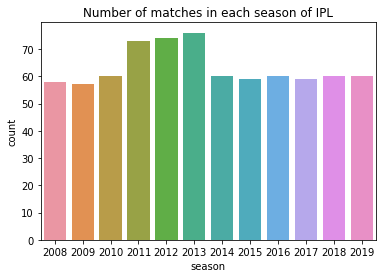

In [33]:
plt.title("Number of matches in each season of IPL")
sb.countplot(match_df['season'])   #There are more matches in 2011,2012 and 2013 than usual
plt.show()

# Number of matches played in each venue

Text(0.5, 1.0, 'Number of matches played in each venue')

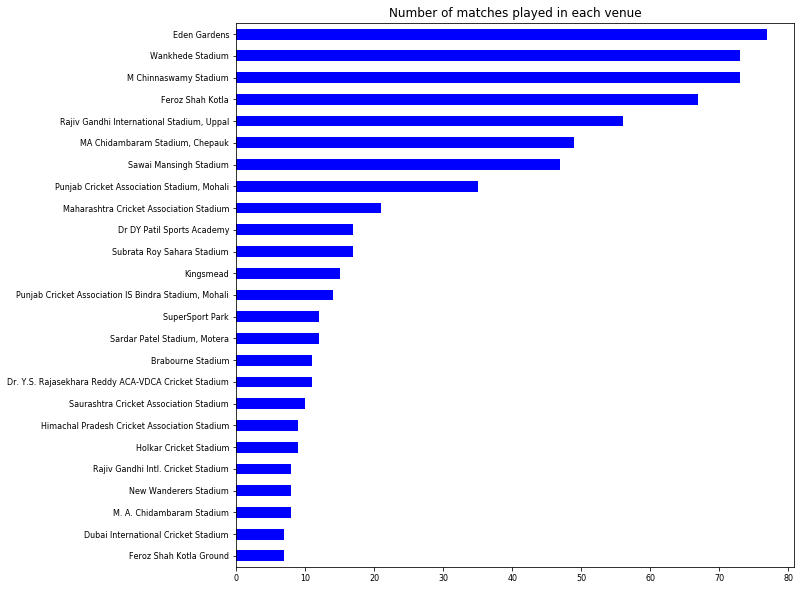

In [46]:
match_df['venue'].value_counts().sort_values(ascending=True).tail(25).plot(kind = 'barh',figsize=(10,10), fontsize=8, color='blue')
plt.title("Number of matches played in each venue")

# Number of matches won by teams in IPL history

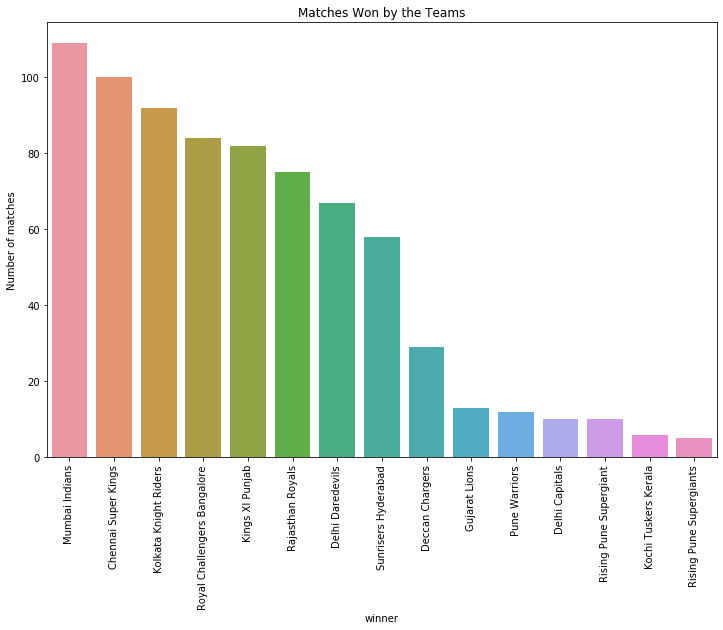

In [51]:
plt.figure(figsize=(12,8))
plt.title('Matches Won by the Teams')
fig=sb.countplot(x=match_df['winner'],order = match_df['winner'].value_counts().index)
plt.ylabel("Number of matches")
plt.xticks(rotation=90)
plt.show()

So, mostly Mumbai Indians followed by Chennai Super Kings have won most matches

Text(0.5, 1.0, 'Toss winning with Match winning')

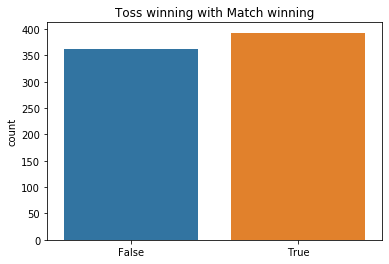

In [69]:
sb.countplot(match_df['toss_winner'] == match_df['winner'])
plt.title("Toss winning with Match winning")

# Decision taken on winning toss

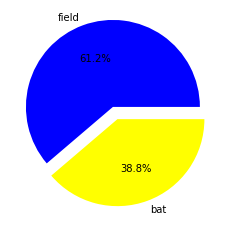

In [52]:
toss_decision = match_df['toss_decision'].value_counts()
colors = ['blue','yellow']
explode = (0.1,0.05)
plt.pie(toss_decision,labels=toss_decision.index,autopct='%1.1f%%',explode=explode,colors = colors)
plt.show()

So, maximum teams take to field first when winning toss in IPL with 61.2% and to bat first with 38.8%

# Toss decisions in each season of IPL

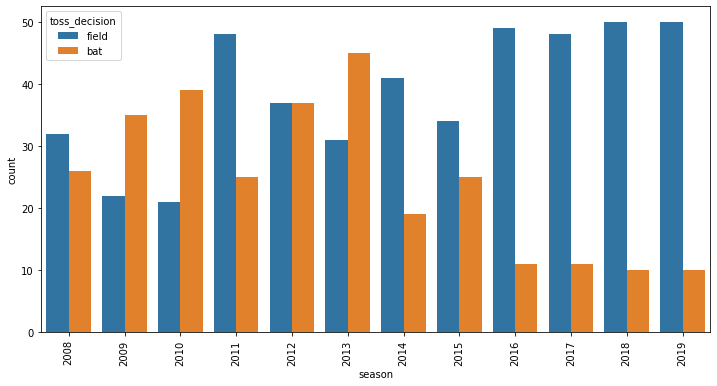

In [53]:
plt.figure(figsize=(12,6))
sb.countplot(match_df['season'], hue=match_df['toss_decision'])
plt.xticks(rotation='vertical')
plt.show()

It seems like in recent seasons, teams winning toss tend to field first starting from 2014, as chasing the target is more favourite

Text(0.5, 0, 'Players')

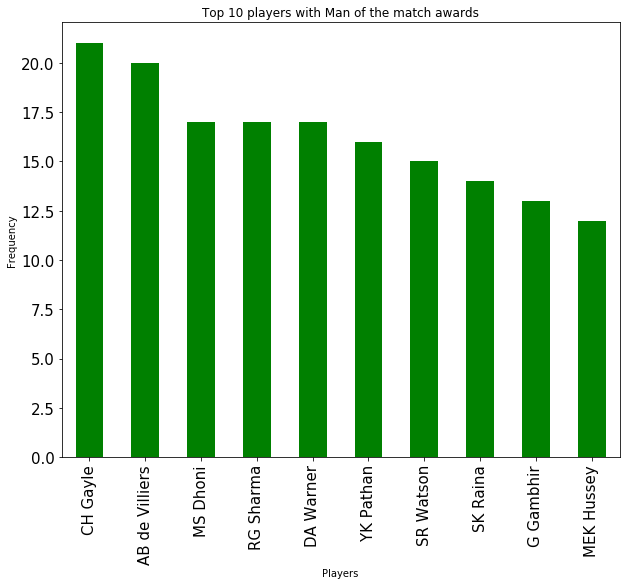

In [60]:
man_of_match= match_df['player_of_match'].value_counts()
man_of_match.head(10).plot(kind = 'bar',figsize=(10,8), fontsize=15, color='green')
plt.title("Top 10 players with Man of the match awards")
plt.ylabel("Frequency")
plt.xlabel("Players")

So, Chris Gayle has won most Man of match awards followed by AB de villiers and MS Dhoni

# Most Runs by Batsman

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text yticklabel objects>)

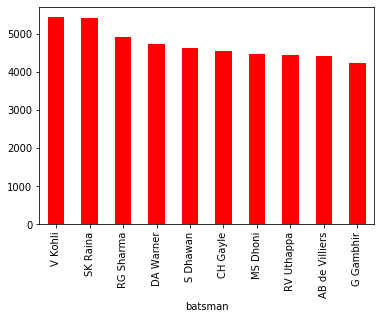

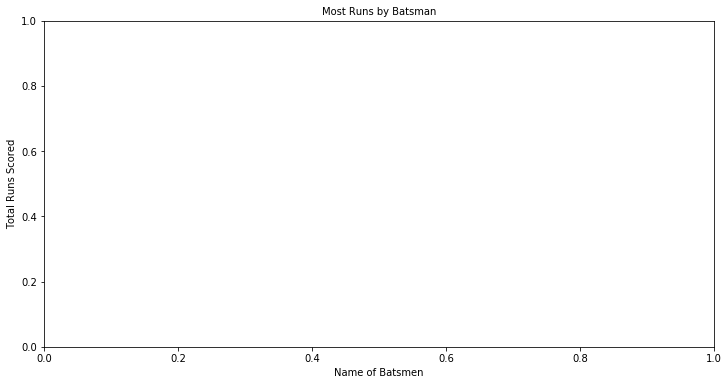

In [79]:
data.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar', color = 'red')
plt.figure(figsize=(12,6))
plt.title("Most Runs by Batsman", fontsize = 10)
plt.xlabel("Name of Batsmen")
plt.ylabel("Total Runs Scored")
plt.xticks(size=10)
plt.yticks(size=10)

Virat Kohli has most runs in followed by Suresh Raina

# Most Wickets taken by Bolwers

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.]),
 <a list of 9 Text yticklabel objects>)

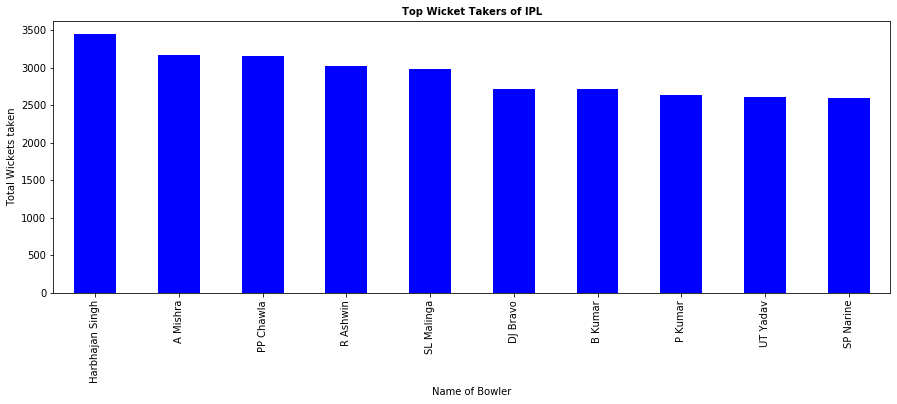

In [83]:
data.groupby('bowler')['player_dismissed'].count().sort_values(ascending = False).head(10).plot(kind = 'bar', color ='blue', figsize = (15,5))
plt.title("Top Wicket Takers of IPL", fontsize =10, fontweight = 'bold')
plt.xlabel("Name of Bowler", size = 10)
plt.ylabel("Total Wickets taken", size = 10)
plt.xticks(size = 10)
plt.yticks(size = 10)

Most Wickets taken by Harbhajan singh 

Text(0, 0.5, 'Teams')

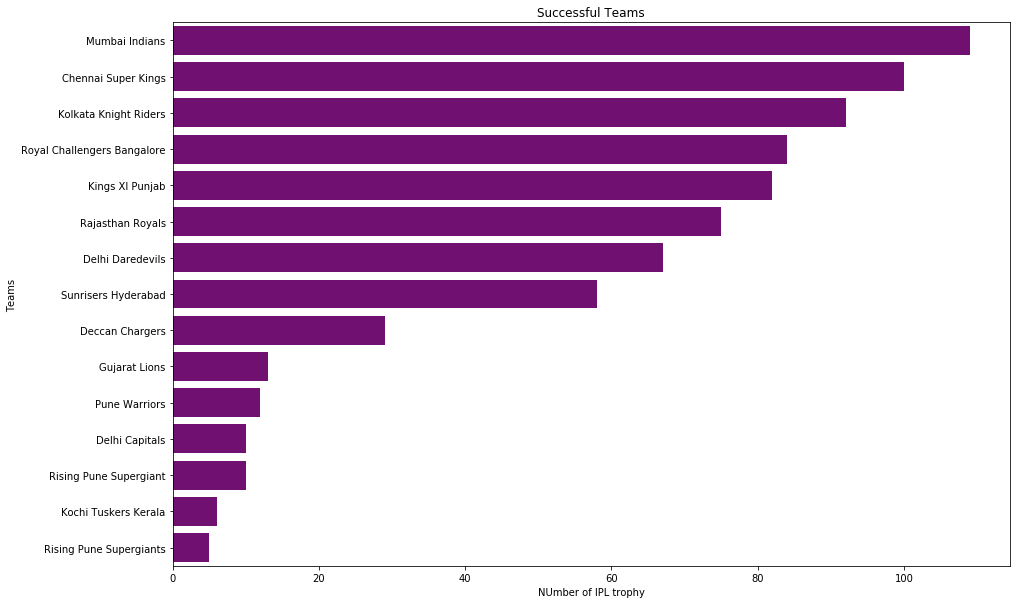

In [86]:
plt.figure(figsize=(15,10))
d = match_df['winner'].value_counts()
sb.barplot(x =d,y =d.index,color="Purple")
plt.title("Successful Teams")
plt.xlabel("NUmber of IPL trophy")
plt.ylabel("Teams")

# So, Mumbai Indians is the most seasons in their bags followed by Chennai Super Kings